In [169]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.regularizers import l1_l2



Load the MNIST dataset

In [170]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()


train_count = len(train_data)
test_count = len(test_data)

print('train_count,test_count',train_count,test_count)

random = np.random.choice(train_count, size=10000, replace=False)

added_test_data = train_data[random]
added_test_target = train_target[random]

test_data = np.concatenate((test_data, added_test_data), axis=0)
test_target = np.concatenate((test_target, added_test_target), axis=0)

train_count,test_count 60000 10000


Visualize the dataset

Target labels:  [0 9 4 5 1 2 6 6 6 2]


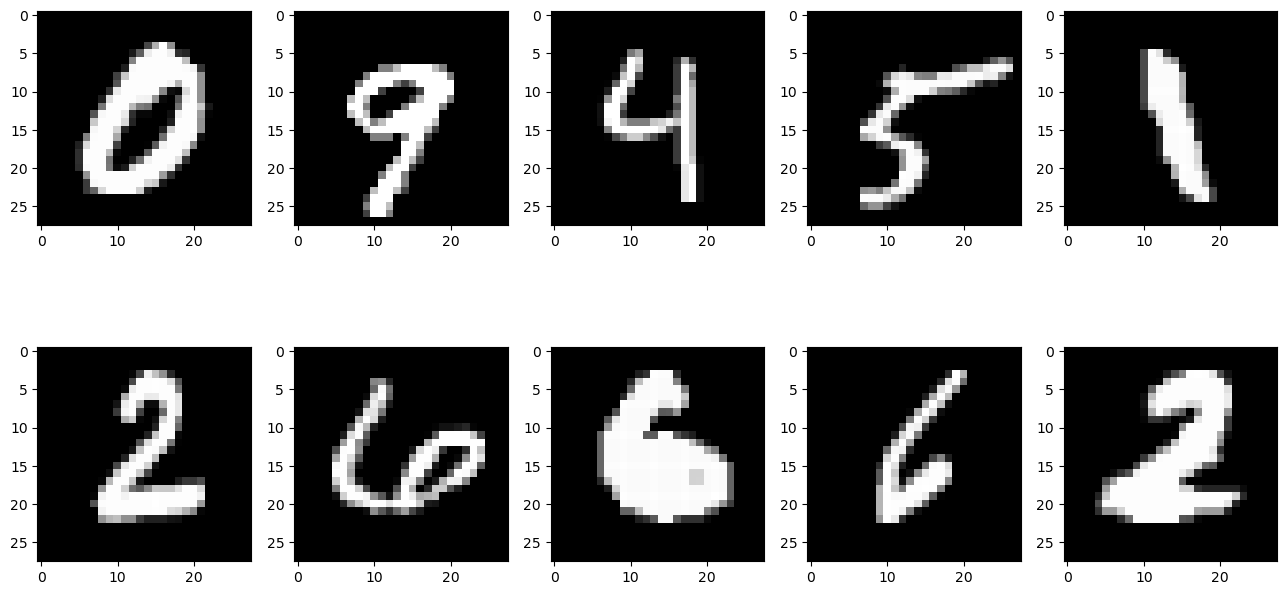

In [171]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [172]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [173]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28)))


model.add(Dense(128, activation='relu', kernel_regularizer=l1_l2(0.001, 0.001)))
model.add(Dense(64, activation='relu', kernel_regularizer=l1_l2(0.001, 0.001)))
model.add(Dense(32, activation='relu', kernel_regularizer=l1_l2(0.001, 0.001)))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [174]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_24 (Flatten)        (None, 784)               0         
                                                                 
 dense_133 (Dense)           (None, 128)               100480    
                                                                 
 dense_134 (Dense)           (None, 64)                8256      
                                                                 
 dense_135 (Dense)           (None, 32)                2080      
                                                                 
 dense_136 (Dense)           (None, 10)                330       
                                                                 
Total params: 111146 (434.16 KB)
Trainable params: 111146 (434.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model

In [175]:
train_info = model.fit(new_train_data, new_train_target, epochs=20, batch_size=128)

Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 1.8543 - accuracy: 0.8593
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.9284 - accuracy: 0.9141
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.7582 - accuracy: 0.9276
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.6680 - accuracy: 0.9334
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.6163 - accuracy: 0.9365
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.5796 - accuracy: 0.9400
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.5507 - accuracy: 0.9419
Epoch 8/20
469/469 [==============================] - 1s 2ms/step - loss: 0.5272 - accuracy: 0.9431
Epoch 9/20
469/469 [==============================] - 1s 2ms/step - loss: 0.5079 - accuracy: 0.9454
Epoch 10/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4956 - accuracy: 0.9449

Plot the loss and accuracy graphs

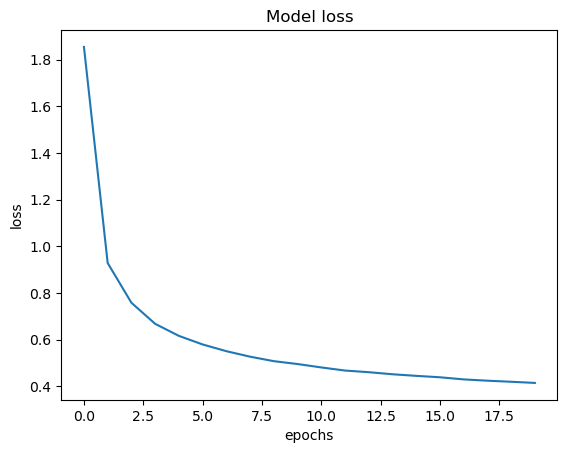

In [176]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

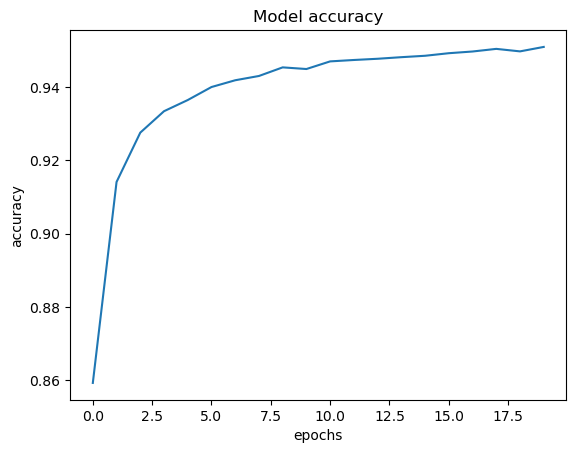

In [177]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [178]:
loss, acc = model.evaluate(new_test_data , new_test_target)

# improved acurracy by aporox 0.001% after Q3PA
#acurracy reduced by aprox 0.02% after Q3PB
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

625/625 [==============================] - 1s 890us/step - loss: 0.4108 - accuracy: 0.9513
Loss of the Test dataset is: 0.4108007848262787
Accuracy of the test dataset is: 0.9513499736785889


Visualize using confusion matrix

625/625 [==============================] - 0s 482us/step


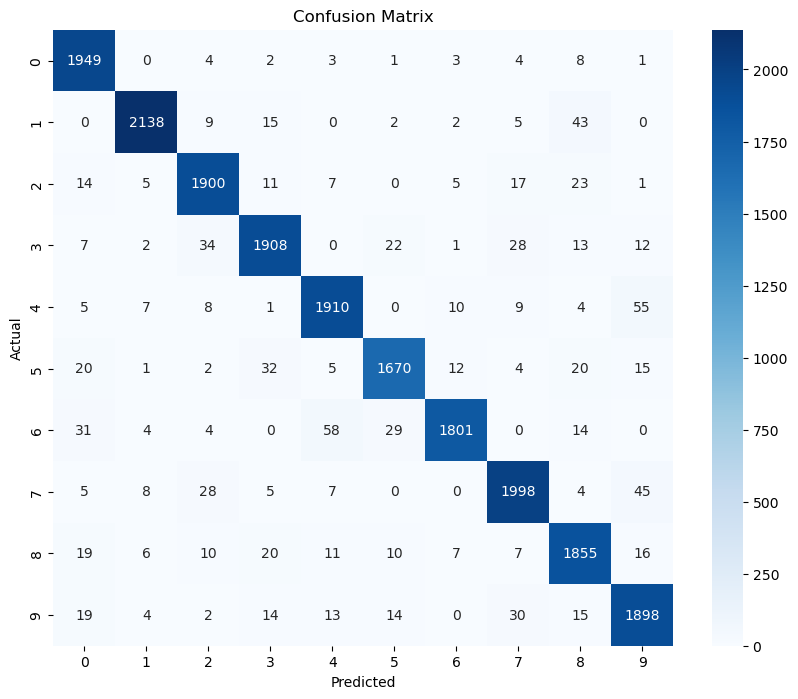

In [179]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions = model.predict(new_test_data)
predicted_labels = np.argmax(predictions, axis=1)

matrix = confusion_matrix(test_target, predicted_labels)

# Visualize confusion matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Save the model weights

In [180]:
model.save_weights('MNIST_WEIGHTS_V1.h5')